In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sunspotsFile=open('sunspots_monthly.txt','r')
raysFile=open('rays_monthly.txt','r')

In [3]:
#1
def getData(file,column):
    """Makes an array of float values for a data set
    
    Args:
        file: the name of the file containing the data
        column: the column of data to within the file
        
    Returns: an array of float values equal to the values in the given column of the file
    """
    dataArray=np.array([])
    newData=file.readline()
    if not newData:
        file=open(file.name,'r')
        newData=file.readline()
    while newData:
        dataArray=np.append(dataArray,[newData.split()[column]])
        newData=file.readline()
    return dataArray.astype('float')

def getPowerSpectrum(data,T):
    """Makes a power spectrum for a data set covering some range of time
    
    Args:
        data: the data set to use
        T: the total length of time covered by the data
    
    Returns: an array containing the power spectrum values for the given data
    """
    N=len(data)
    fft=np.fft.fft(data)
    powerSpectrum=((T**2)/(N**2))*np.multiply(fft,np.conj(fft))
    return powerSpectrum

def getPowerSpectrumRealSignal(data,T):
    """Makes a power spectrum for an entirely real data set
    
    Args:
        data: the data set to use
        T: the total length of time covered by the data
        
    Returns: an array containing the positive frequency components of the power spectrum for the given data
    """
    N=len(data)
    rfft=np.fft.rfft(data)
    powerSpectrum=((T**2)/(N**2))*np.multiply(rfft,np.conj(rfft))
    return powerSpectrum

def getKVals(data):
    """Generates an array of evenly spaced values spanning the length of the data
    
    Args:
        data: the data used to determine the length of the output
        
    Returns: an array of evenly spaced values ranging from zero to the length of the data
    """
    return np.linspace(0,len(data)-1,len(data))

def kToFreq(kVals,T):
    """Converts arrays of wave numbers into frequencies
    
    Args:
        kVals: array containing the wave number values to convert
        T: the time period of the data represented by the wave numbers
        
    Returns: an array containing the frequency values corresponding the wave numbers and time period
    """
    modArray=np.hstack((np.zeros(len(kVals)-len(kVals)//2),len(kVals)*np.ones(len(kVals)//2)))
    return (1/T)*np.subtract(kVals,modArray)

def kToFreqRealSignal(kVals,T):
    """Converts arrays of wave numbers into frequencies
    
    Args:
        kVals: array containing the wave number values to convert
        T: the time period of the data represented by the wave numbers
        
    Returns: an array containing the frequency values corresponding the wave numbers and time period
    """
    return kVals/T

def timePeriodFromFreq(freq):
    """Returns the time period for a given frequency
    
    Args:
        freq: frequency
        
    Returns: time period
    """
    return 1/freq

#2,3
def normalizeData(data):
    """Gives a version of a data set normalized using its mean and standard deviation
    
    Args:
        data: the data set to normalize
        
    Returns: a normalized version of the data
    """
    return (data-np.mean(data))/np.std(data)

def padData(data):
    """Adds zeroes to the end of a data set for use in correlation functions
    
    Args:
        data: the data set to pad
        
    Returns: an array twice the length of the given data with first half equal to the given data and second half with zeros
    """
    N=len(data)
    return np.hstack((data,np.zeros(N))).astype('float')

def getLs(data):
    """Gets lag times for correlation functions of data sets
    
    Args:
        data: the data set used to determine the size of the lag time array
        
    Returns: an array of possible lag time values corresponding to the data
    """
    N=len(data)
    return np.hstack((np.linspace(0,N-1,N),np.linspace(0,N-1,N)-N))

def correlation(_data1,_data2):
    """Computes the discrete correlation function array values for two data sets
    
    Args:
        _data1: the first data set
        _data2: the second data set
        
    Returns: Array of the correlation function values for the data sets given
    """
    data1=padData(normalizeData(_data1))
    data2=padData(normalizeData(_data2))
    Ls=getLs(_data1)
    ifft=np.fft.ifft(np.multiply(np.fft.fft(data1),np.conj(np.fft.fft(data2))))
    divFactors=len(_data1)-Ls
    return np.divide(ifft,divFactors)

#4
def lowpass(data,f0,T):
    """Applies a sharp low pass filter to a data set
    
    Args:
        data: the unfiltered data
        f0: the cutoff frequency, at or above which no frequency components are returned
        T: the length of time covered by the data
        
    Returns: an array with all frequency contributions from frequencies at or above the cutoff frequency eliminated
    """
    fft=np.fft.fft(data)
    kVals=getKVals(data)
    freqVals=kToFreq(kVals,T)
    for i in range(len(freqVals)):
        if np.abs(freqVals[i])>=f0:
            fft[i]=0
    return np.fft.ifft(fft)

In [4]:
#1 data preparation
sunspotsData=getData(sunspotsFile,1)
raysData=getData(raysFile,2)

Text(0,0.5,'Monthly mean Sunspot Number')

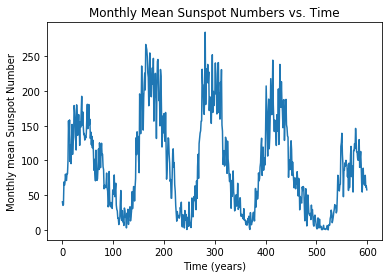

In [5]:
#0 raw sunspots plot

plt.plot(np.linspace(0,599,600),sunspotsData)
plt.title('Monthly Mean Sunspot Numbers vs. Time')
plt.xlabel('Time (years)')
plt.ylabel('Monthly mean Sunspot Number')

Text(0,0.5,'Mean Sunspot Number')

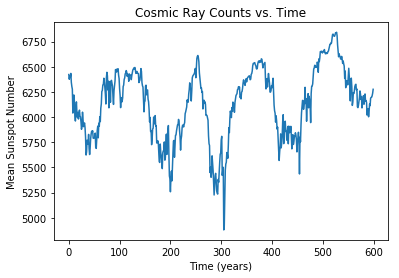

In [6]:
#0 raw cosmic rays plot

plt.plot(np.linspace(0,599,600),raysData)
plt.title('Cosmic Ray Counts vs. Time')
plt.xlabel('Time (years)')
plt.ylabel('Mean Sunspot Number')

([], <a list of 0 Text yticklabel objects>)

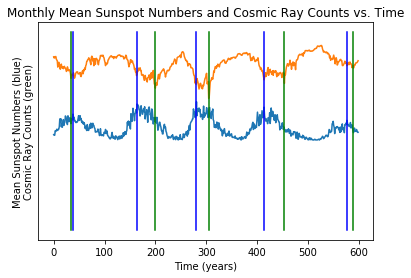

In [7]:
#3 raw data plots with vertical lines at extrema to show lag in cosmic ray increase on alternating years

# change scale of data for easier comparison
plt.plot(np.linspace(0,599,600),15*sunspotsData+10000)
plt.plot(np.linspace(0,599,600),3*raysData)

# add vertical lines intersecting maximums of sunspots data
plt.plot(np.argmax(sunspotsData[0:100])*np.array([1,1]),np.array([0,22000]),color='blue')
plt.plot(100+np.argmax(sunspotsData[100:250])*np.array([1,1]),np.array([0,22000]),color='blue')
plt.plot(250+np.argmax(sunspotsData[250:350])*np.array([1,1]),np.array([0,22000]),color='blue')
plt.plot(350+np.argmax(sunspotsData[350:500])*np.array([1,1]),np.array([0,22000]),color='blue')
plt.plot(500+np.argmax(sunspotsData[500:599])*np.array([1,1]),np.array([0,22000]),color='blue')

# add vertical lines intersecting minimums of cosmic rays data
plt.plot(np.argmin(raysData[0:100])*np.array([1,1]),np.array([0,22000]),color='green')
plt.plot(100+np.argmin(raysData[100:250])*np.array([1,1]),np.array([0,22000]),color='green')
plt.plot(250+np.argmin(raysData[250:350])*np.array([1,1]),np.array([0,22000]),color='green')
plt.plot(350+np.argmin(raysData[350:500])*np.array([1,1]),np.array([0,22000]),color='green')
plt.plot(500+np.argmin(raysData[500:599])*np.array([1,1]),np.array([0,22000]),color='green')

plt.title('Monthly Mean Sunspot Numbers and Cosmic Ray Counts vs. Time')
plt.xlabel('Time (years)')
plt.ylabel('Mean Sunspot Numbers (blue)\nCosmic Ray Counts (green)')
plt.yticks([])

max nonzero sunspots power spectrum value:  (2597081.377750003+0j)
max nonzero sunspots power spectrum index:  5
max nonzero sunspots power spectrum frequency in years^-1:  0.1
max nonzero sunspots power spectrum time period in years:  10.0


/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0,0.5,'Power')

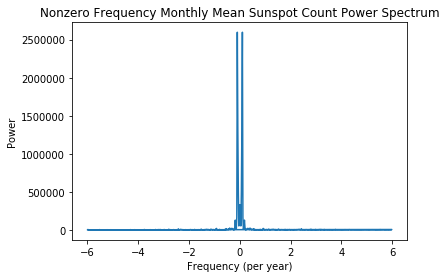

In [8]:
# 1 sunspots power spectrum

kVals=np.linspace(0,599,600)
freqs=kToFreq(kVals,50)
sunspotsPowerSpectrum=getPowerSpectrum(sunspotsData,50)
plt.plot(freqs[1:],sunspotsPowerSpectrum[1:])
maxNonZeroSunspotsPowerSpectrumValue=np.max(sunspotsPowerSpectrum[1:])
maxNonZeroSunspotsPowerSpectrumIndex=np.argmax(sunspotsPowerSpectrum[1:])+1
maxNonZeroSunspotsPowerSpectrumFrequency=freqs[maxNonZeroSunspotsPowerSpectrumIndex]
print('max nonzero sunspots power spectrum value: ',maxNonZeroSunspotsPowerSpectrumValue)
print('max nonzero sunspots power spectrum index: ',maxNonZeroSunspotsPowerSpectrumIndex)
print('max nonzero sunspots power spectrum frequency in years^-1: ',maxNonZeroSunspotsPowerSpectrumFrequency)
print('max nonzero sunspots power spectrum time period in years: ',timePeriodFromFreq(maxNonZeroSunspotsPowerSpectrumFrequency))

plt.title('Nonzero Frequency Monthly Mean Sunspot Count Power Spectrum')
plt.xlabel('Frequency (per year)')
plt.ylabel('Power')

max nonzero rays power spectrum value:  (40109640.16262037+0j)
max nonzero rays power spectrum frequency in years^-1:  0.1
max nonzero rays power spectrum time period in years:  10.0


/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0,0.5,'Power')

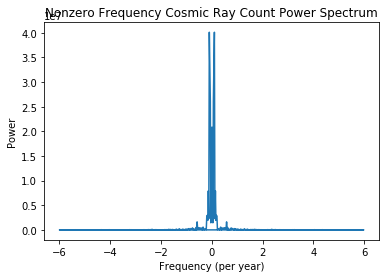

In [9]:
#1 rays power spectrum

raysPowerSpectrum=getPowerSpectrum(raysData,50)
plt.plot(freqs[1:],raysPowerSpectrum[1:])
maxNonZeroRaysPowerSpectrumValue=np.max(raysPowerSpectrum[1:])
maxNonZeroRaysPowerSpectrumIndex=np.argmax(raysPowerSpectrum[1:])+1
maxNonZeroRaysPowerSpectrumFrequency=freqs[maxNonZeroRaysPowerSpectrumIndex]
print('max nonzero rays power spectrum value: ',maxNonZeroRaysPowerSpectrumValue)
print('max nonzero rays power spectrum frequency in years^-1: ',maxNonZeroRaysPowerSpectrumFrequency)
print('max nonzero rays power spectrum time period in years: ',timePeriodFromFreq(maxNonZeroRaysPowerSpectrumFrequency))

plt.title('Nonzero Frequency Cosmic Ray Count Power Spectrum')
plt.xlabel('Frequency (per year)')
plt.ylabel('Power')

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0,0.5,'Autocorrelation')

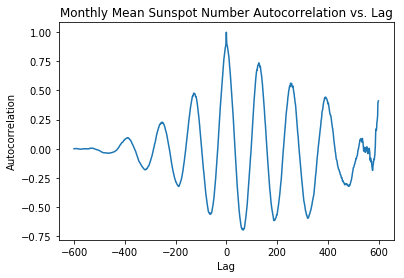

In [10]:
#2 sunspots autocorrelation

Ls=getLs(sunspotsData)
sunspotsAutocorrelation=correlation(sunspotsData,sunspotsData)
plt.plot(np.hstack((Ls[600:],Ls[:600])),np.hstack((sunspotsAutocorrelation[600:],sunspotsAutocorrelation[:600])))

plt.title('Monthly Mean Sunspot Number Autocorrelation vs. Lag')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0,0.5,'Autocorrelation')

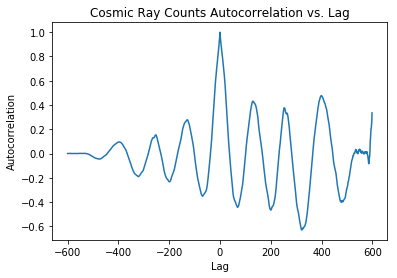

In [11]:
#2 cosmic rays autocorrelation

raysAutocorrelation=correlation(raysData,raysData)
plt.plot(np.hstack((Ls[600:],Ls[:600])),np.hstack((raysAutocorrelation[600:],raysAutocorrelation[:600])))

plt.title('Cosmic Ray Counts Autocorrelation vs. Lag')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

In [12]:
#3 get cross correlation
crossCorrelation=correlation(sunspotsData,raysData)

1195
318
(-0.7892129967060167-2.516258806255994e-17j)
(-0.8197603554123674-2.765124749677601e-15j)
-5.0
318.0


/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0,0.5,'Correlation')

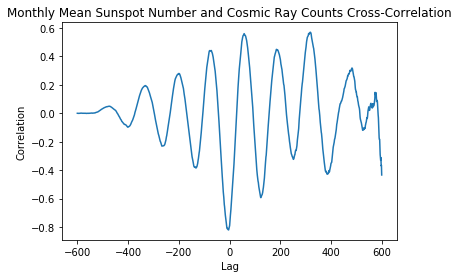

In [13]:
#3 plot cross correlation
Ls=getLs(sunspotsData)
print(np.argmin(crossCorrelation))
print(np.argmax(crossCorrelation))
print(crossCorrelation[0])
print(crossCorrelation[np.argmin(crossCorrelation)])
print(Ls[np.argmin(crossCorrelation)])
print(Ls[np.argmax(crossCorrelation)])
plt.plot(np.hstack((Ls[600:],Ls[:600])),np.hstack((crossCorrelation[600:],crossCorrelation[:600])))

plt.title('Monthly Mean Sunspot Number and Cosmic Ray Counts Cross-Correlation')
plt.xlabel('Lag')
plt.ylabel('Correlation')

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0,0.5,'Mean Sunspot Numbers')

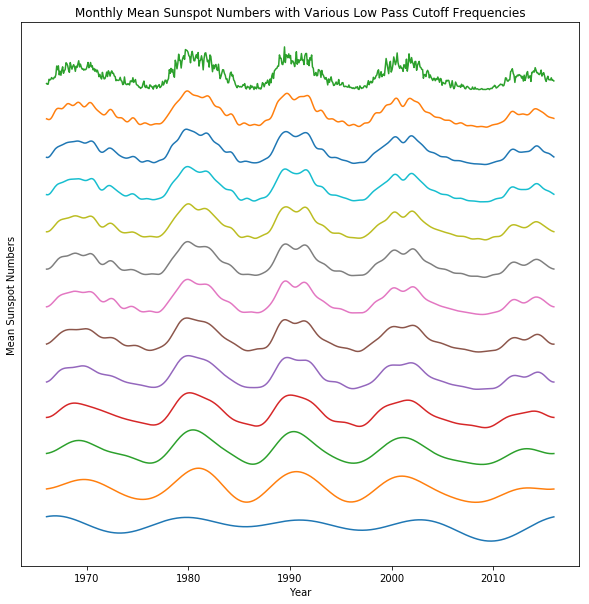

In [14]:
#4 
plt.figure(figsize=(10,10))
#x1,x2,y1,y2=plt.axis()
#plt.axis((-6,6,-1600,1600))
sunspotTimes=getData(sunspotsFile,0)
for i in range(12):
    plt.plot(sunspotTimes,lowpass(sunspotsData,(i+1)/12,50)+250*i)
plt.plot(sunspotTimes,sunspotsData+250*12)
#plt.plot(kToFreq(kVals,50),lowpass(sunspotsData,1/12,50)-250)
#plt.plot(kToFreq(kVals,50),lowpass(sunspotsData,1/6,50))
#plt.plot(kToFreq(kVals,50),lowpass(sunspotsData,3/6,50)+250)
#plt.plot(kToFreq(kVals,50),lowpass(sunspotsData,6/6,50)+500)

plt.yticks([])
plt.title('Monthly Mean Sunspot Numbers with Various Low Pass Cutoff Frequencies')
plt.xlabel('Year')
plt.ylabel('Mean Sunspot Numbers')

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0,0.5,'Cosmic Rays')

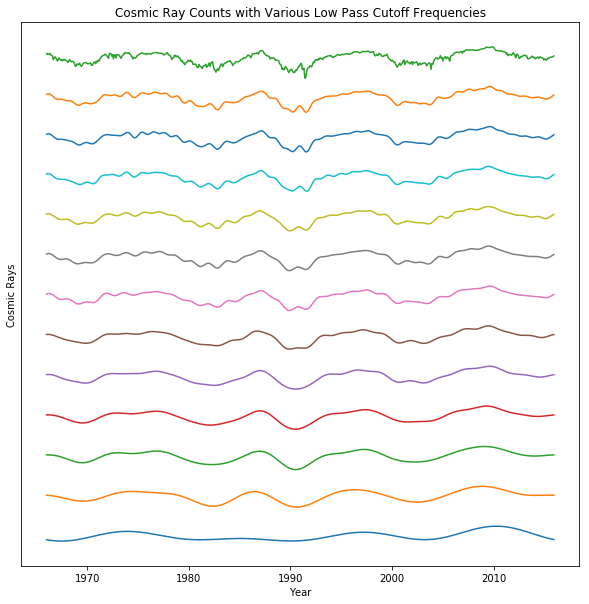

In [15]:
#4
plt.figure(figsize=(10,10))
#x1,x2,y1,y2=plt.axis()
#plt.axis((-6,6,-1600,1600))
rayTimes=getData(raysFile,0)
for i in range(12):
    plt.plot(rayTimes,lowpass(raysData,(i+1)/12,50)+2500*i)
plt.plot(rayTimes,raysData+2500*12)
#plt.plot(kToFreq(kVals,50),lowpass(sunspotsData,1/12,50)-250)
#plt.plot(kToFreq(kVals,50),lowpass(sunspotsData,1/6,50))
#plt.plot(kToFreq(kVals,50),lowpass(sunspotsData,3/6,50)+250)
#plt.plot(kToFreq(kVals,50),lowpass(sunspotsData,6/6,50)+500)

plt.yticks([])
plt.title('Cosmic Ray Counts with Various Low Pass Cutoff Frequencies')
plt.xlabel('Year')
plt.ylabel('Cosmic Rays')

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


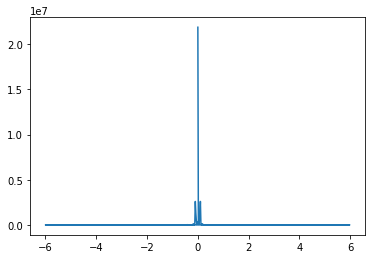

In [16]:
freqs=kToFreq(kVals,50)
plt.plot(freqs,sunspotsPowerSpectrum)

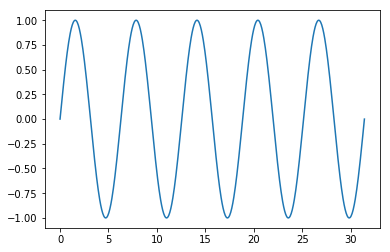

In [17]:
#Testing how improper period affects fft
x1Vals=np.linspace(0,10*np.pi,600)
x2Vals=np.linspace(0,50,600)
sin1Vals=np.sin(x1Vals)
sin2Vals=np.sin(x2Vals)
plt.plot(x1Vals,sin1Vals)

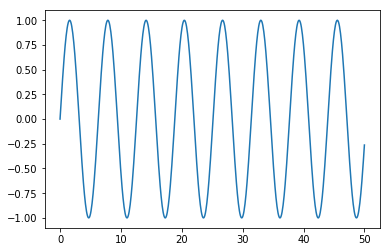

In [18]:
plt.plot(x2Vals,sin2Vals)

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


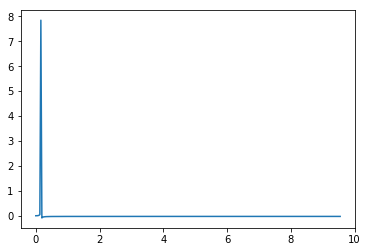

In [19]:
sin1fft=np.fft.rfft(sin1Vals)
k1Vals=getKVals(sin1fft)
freq1Vals=kToFreqRealSignal(k1Vals,10*np.pi)
plt.plot(freq1Vals,sin1fft)

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


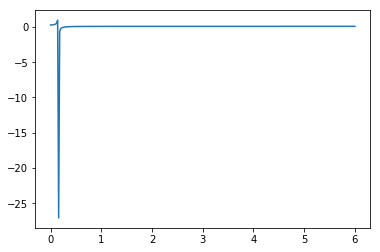

In [20]:
sin2fft=np.fft.rfft(sin2Vals)
k2Vals=getKVals(sin2fft)
freq2Vals=kToFreqRealSignal(k2Vals,50)
plt.plot(freq2Vals,sin2fft)

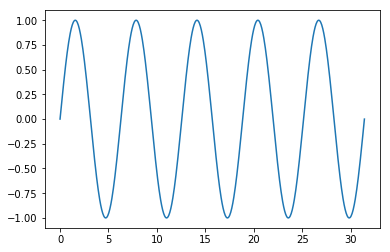

In [21]:
sin1ifft=np.fft.irfft(sin1fft)
plt.plot(x1Vals,sin1ifft)

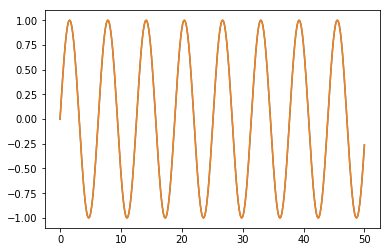

In [22]:
sin2ifft=np.fft.irfft(sin2fft)
plt.plot(x2Vals,sin2ifft)
plt.plot(x2Vals,sin2Vals)

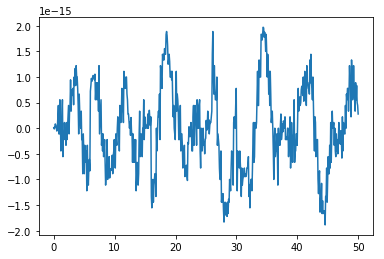

In [23]:
plt.plot(x2Vals,np.subtract(sin2ifft,sin2Vals))

(246.27205719218853+0j)
5
0.15915494309189535


/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


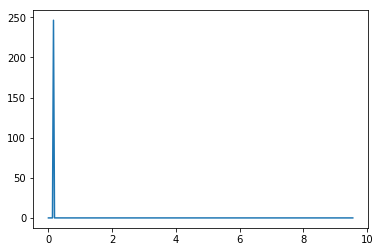

In [24]:
sin1PowerSpect=getPowerSpectrumRealSignal(sin1Vals,10*np.pi)
fullFreq1=kToFreqRealSignal(getKVals(sin1PowerSpect),10*np.pi)
plt.plot(fullFreq1,sin1PowerSpect)
maxSin1PowerSpectVal=np.max(sin1PowerSpect)
maxSin1PowerSpectInd=np.argmax(sin1PowerSpect)
maxSin1PowerSpectFreq=freq1Vals[maxSin1PowerSpectInd]
print(maxSin1PowerSpectVal)
print(maxSin1PowerSpectInd)
print(maxSin1PowerSpectFreq)

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(625.4628620636478+0j)
8
0.16


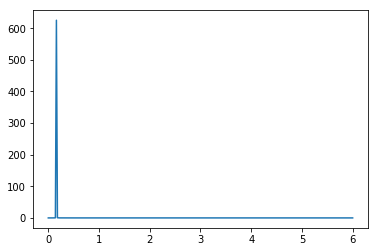

In [25]:
sin2PowerSpect=getPowerSpectrumRealSignal(sin2Vals,50)
fullFreq2=kToFreqRealSignal(getKVals(sin2PowerSpect),50)
plt.plot(fullFreq2,sin2PowerSpect)
maxSin2PowerSpectVal=np.max(sin2PowerSpect)
maxSin2PowerSpectInd=np.argmax(sin2PowerSpect)
maxSin2PowerSpectFreq=freq2Vals[maxSin2PowerSpectInd]
print(maxSin2PowerSpectVal)
print(maxSin2PowerSpectInd)
print(maxSin2PowerSpectFreq)

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


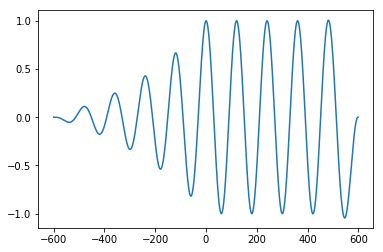

In [26]:
sin1Ls=getLs(sin1Vals)
sin1Autocorrelation=correlation(sin1Vals,sin1Vals)
plt.plot(np.hstack((sin1Ls[len(sin1Ls)//2:],sin1Ls[:len(sin1Ls)//2])),np.hstack((sin1Autocorrelation[len(sin1Ls)//2:],sin1Autocorrelation[:len(sin1Ls)//2])))

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


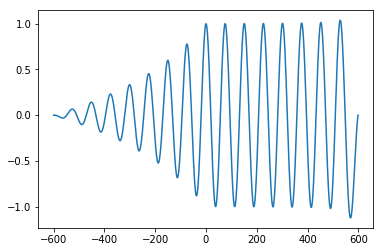

In [27]:
sin2Ls=getLs(sin2Vals)
sin2Autocorrelation=correlation(sin2Vals,sin2Vals)
plt.plot(np.hstack((sin2Ls[len(sin2Ls)//2:],sin2Ls[:len(sin2Ls)//2])),np.hstack((sin2Autocorrelation[len(sin2Ls)//2:],sin2Autocorrelation[:len(sin2Ls)//2])))

(1199,)
(1199,)


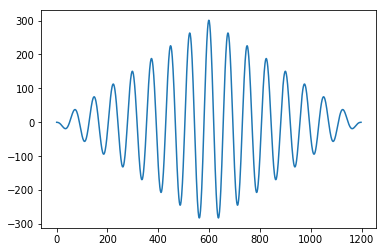

In [28]:
autocor2=np.correlate(sin2Vals,sin2Vals,mode='full')
print(autocor2.shape)
print(getKVals(autocor2).shape)
plt.plot(getKVals(autocor2),autocor2)

(1199,)
(1199,)


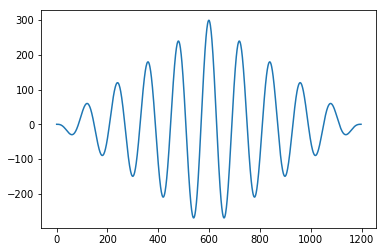

In [29]:
autocor1=np.correlate(sin1Vals,sin1Vals,mode='full')
print(autocor1.shape)
print(getKVals(autocor1).shape)
plt.plot(getKVals(autocor1),autocor1)

In [30]:
def welchMethod(data,window,M,D):
    #M is length of segment, D is overlap
    #M and D must be chosen to encompass all data
    #np.blackman(M) for blackman windown
    N=len(data)
    interval=M-D
    segments=[]
    i=0
    while D+interval*i<N:#should be != instead of < if M and D fit properly
        segments.append(data[i*interval:i*interval+M])#data slice may be wrong
        i+=1
    windowedSegments=[np.multiply(segment,window) for segment in segments]
    ffts=[np.fft.fft(seg) for seg in windowedSegments]
    sqffts=[np.multiply(fft,np.conj(fft))/M for fft in ffts]
    avgs=np.zeros(len(sqffts[0]))
    for sqfft in sqffts:
        avgs=np.add(avgs,sqfft)
    avgs/=len(sqffts)
    return avgs

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


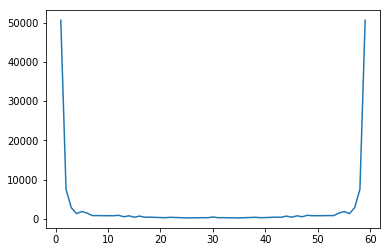

In [31]:
sunspotsWelch=welchMethod(sunspotsData,1,60,30)
sunspotsFreqBins=np.linspace(0,len(sunspotsWelch)-1,len(sunspotsWelch))
plt.plot(sunspotsFreqBins[1:],sunspotsWelch[1:])

In [32]:
sunspotsWelch[1:]

array([50613.9544422 +0.j,  7502.99203656+0.j,  2847.0250096 +0.j,
        1324.5998233 +0.j,  1866.4284773 +0.j,  1472.17505912+0.j,
         820.5001021 +0.j,   833.59783696+0.j,   803.36930745+0.j,
         801.41480702+0.j,   784.48788154+0.j,   909.62913522+0.j,
         530.36975429+0.j,   768.53411012+0.j,   411.41666667+0.j,
         699.31951443+0.j,   405.25246036+0.j,   429.33672158+0.j,
         377.08120359+0.j,   320.0305614 +0.j,   298.57791753+0.j,
         395.71521108+0.j,   329.36089034+0.j,   293.19483846+0.j,
         234.64590866+0.j,   277.85554576+0.j,   264.48144964+0.j,
         306.27458847+0.j,   280.13221295+0.j,   469.52459649+0.j,
         280.13221295+0.j,   306.27458847+0.j,   264.48144964+0.j,
         277.85554576+0.j,   234.64590866+0.j,   293.19483846+0.j,
         329.36089034+0.j,   395.71521108+0.j,   298.57791753+0.j,
         320.0305614 +0.j,   377.08120359+0.j,   429.33672158+0.j,
         405.25246036+0.j,   699.31951443+0.j,   411.41666667+